In [1]:
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import cv2
import numpy as np
from loadimages import load_images
import random
from models import FlowNetS4
from matplotlib import pyplot as plt

In [2]:
sequences = load_images(3)
random.shuffle(sequences)
sequences = sequences[:300]

In [3]:
number_of_epochs = 50
model = FlowNetS4()
loss_fn = nn.MSELoss()
# model.load_state_dict(torch.load('./etc.pt))
model.cuda()
learning_rate = 1e-1
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=1, gamma=0.98)

In [ ]:
training_losses = []
validation_losses = []
training_range = int(len(sequences) * 0.8)

print('started training')
for epoch in range(number_of_epochs):
  training_loss = 0.0
  validation_loss = 0.0
  for data in sequences[:training_range]:
    out = model(data[0].unsqueeze(0))
    loss = loss_fn(out.squeeze(0), data[1])
    optimizer.zero_grad()
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), 6.0)
    training_loss += loss.item()
    optimizer.step()

  for data in sequences[training_range:]:
    out = model(data[0].unsqueeze(0))
    loss = loss_fn(out.squeeze(0), data[1])
    validation_loss += loss.item()
    
  training_losses.append(training_loss)
  validation_losses.append(validation_loss)
  torch.save(model.state_dict(), './flownets4.pt')
  print('Training loss: ' + str(training_loss) + ' ; Validation loss: ' + str(validation_loss) + ' ; Epoch: ' + str(epoch))

started training
Training loss: 2020661.0749511719 ; Validation loss: 304073.8786010742 ; Epoch: 0
Training loss: 679733.9605789185 ; Validation loss: 119739.52935791016 ; Epoch: 1
Training loss: 318767.4983062744 ; Validation loss: 72986.19825744629 ; Epoch: 2
Training loss: 227883.50424194336 ; Validation loss: 58681.37781524658 ; Epoch: 3


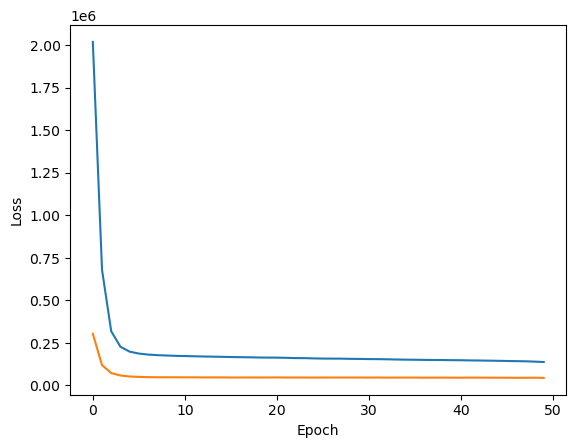

In [5]:
plt.plot(training_losses)
plt.plot(validation_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()